In [26]:
# Importing the libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import catboost

In [27]:
df = pd.read_excel("dataset.xlsx")
df

,Успех,Площадь загальна кв.м,Этаж,Количество сотрудников в штаті,Тип,Кількість відгуків в гуглі,Количество чеков в месяц,Средний чек,Середній дохід населення,Населення середнє,Спеціалізований хліб,Спеціалізоване м'ясо,Спеціалізований сир,Спеціалізована поб. Хімія,Супермаркет
0,не успішний,9.00,1,2,Light,NaN,1230.0,76.85,14910.0,3807.0,1,1,1,0,1
1,не успішний,30.00,1,2,Light,8.0,2715.0,84.86,9030.0,9086.0,0,0,0,0,1
2,не успішний,15.00,1,2,light,NaN,878.0,112.02,9030.0,6383.0,1,0,0,0,0
3,не успішний,20.00,1,2,light,NaN,2346.0,119.80,13930.0,4.0,1,1,0,0,1
4,не успішний,30.00,1,2,light,NaN,2542.0,94.88,14560.0,426.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,успішний,51.77,1,6,Standart,4.0,13552.0,107.37,9800.0,12018.0,1,0,0,1,0
65,успішний,27.26,1,4,Light,3.0,7598.0,89.13,12600.0,10121.0,1,1,1,1,0
66,не успішний,148.91,1,2,Light,12.0,5431.0,105.62,10570.0,7221.0,0,0,0,0,0
67,не успішний,50.93,1,3,Standart,17.0,4375.0,168.07,12460.0,3137.0,0,1,1,0,0


In [28]:
# Cheking Missing data
df.isnull().sum()

Успех                              0
Площадь загальна кв.м              0
Этаж                               0
Количество сотрудников в штаті     0
Тип                                0
Кількість відгуків в гуглі        30
Количество чеков в месяц           7
Средний чек                        7
Середній дохід населення           5
Населення середнє                  5
Спеціалізований хліб               0
Спеціалізоване м'ясо               0
Спеціалізований сир                0
Спеціалізована поб. Хімія          0
Супермаркет                        0
dtype: int64

In [29]:
#we need to get rid of null values in 'Кількість відгуків в гуглі', 'Количество чеков в месяц', 'Средний чек', 'Середній дохід населення', 'Населення середнє'
#these columns are numeric so we will fill them with average values

In [30]:
dfm = df

from sklearn.impute import SimpleImputer

imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
dfm[['Кількість відгуків в гуглі']] = imputer_mean.fit_transform(dfm[['Кількість відгуків в гуглі']]).round()
dfm[['Количество чеков в месяц']] = imputer_mean.fit_transform(dfm[['Количество чеков в месяц']]).round()
dfm[['Средний чек']] = imputer_mean.fit_transform(dfm[['Средний чек']]).round()
dfm[['Середній дохід населення']] = imputer_mean.fit_transform(dfm[['Середній дохід населення']]).round()
dfm[['Населення середнє']] = imputer_mean.fit_transform(dfm[['Населення середнє']]).round()

In [31]:
dfm.isnull().sum()

Успех                             0
Площадь загальна кв.м             0
Этаж                              0
Количество сотрудников в штаті    0
Тип                               0
Кількість відгуків в гуглі        0
Количество чеков в месяц          0
Средний чек                       0
Середній дохід населення          0
Населення середнє                 0
Спеціалізований хліб              0
Спеціалізоване м'ясо              0
Спеціалізований сир               0
Спеціалізована поб. Хімія         0
Супермаркет                       0
dtype: int64

In [32]:
print(dfm['Этаж'].value_counts())

1    69
Name: Этаж, dtype: int64


In [33]:
# Drop useless
dfm = dfm.drop(['Этаж'], axis='columns', inplace=False)
dfm.head()

,Успех,Площадь загальна кв.м,Количество сотрудников в штаті,Тип,Кількість відгуків в гуглі,Количество чеков в месяц,Средний чек,Середній дохід населення,Населення середнє,Спеціалізований хліб,Спеціалізоване м'ясо,Спеціалізований сир,Спеціалізована поб. Хімія,Супермаркет
0,не успішний,9.0,2,Light,43.0,1230.0,77.0,14910.0,3807.0,1,1,1,0,1
1,не успішний,30.0,2,Light,8.0,2715.0,85.0,9030.0,9086.0,0,0,0,0,1
2,не успішний,15.0,2,light,43.0,878.0,112.0,9030.0,6383.0,1,0,0,0,0
3,не успішний,20.0,2,light,43.0,2346.0,120.0,13930.0,4.0,1,1,0,0,1
4,не успішний,30.0,2,light,43.0,2542.0,95.0,14560.0,426.0,0,0,0,0,0


In [34]:
#we need to encode non-numeric data
dfm['Успех'].value_counts()

не успішний    44
успішний       25
Name: Успех, dtype: int64

In [35]:
success = {'не успішний':0,'успішний':1}
dfm['Успех'] = dfm['Успех'].map(success)

In [36]:
dfm['Тип'].value_counts()

Light       39
Standart    19
light        9
Premium      1
Micro        1
Name: Тип, dtype: int64

In [37]:
type = {'Light':0,'Standart':1, 'light':0, 'Micro':2, 'Premium': 3}
dfm['Тип'] = dfm['Тип'].map(type)

In [38]:
dfm

,Успех,Площадь загальна кв.м,Количество сотрудников в штаті,Тип,Кількість відгуків в гуглі,Количество чеков в месяц,Средний чек,Середній дохід населення,Населення середнє,Спеціалізований хліб,Спеціалізоване м'ясо,Спеціалізований сир,Спеціалізована поб. Хімія,Супермаркет
0,0,9.00,2,0,43.0,1230.0,77.0,14910.0,3807.0,1,1,1,0,1
1,0,30.00,2,0,8.0,2715.0,85.0,9030.0,9086.0,0,0,0,0,1
2,0,15.00,2,0,43.0,878.0,112.0,9030.0,6383.0,1,0,0,0,0
3,0,20.00,2,0,43.0,2346.0,120.0,13930.0,4.0,1,1,0,0,1
4,0,30.00,2,0,43.0,2542.0,95.0,14560.0,426.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,1,51.77,6,1,4.0,13552.0,107.0,9800.0,12018.0,1,0,0,1,0
65,1,27.26,4,0,3.0,7598.0,89.0,12600.0,10121.0,1,1,1,1,0
66,0,148.91,2,0,12.0,5431.0,106.0,10570.0,7221.0,0,0,0,0,0
67,0,50.93,3,1,17.0,4375.0,168.0,12460.0,3137.0,0,1,1,0,0


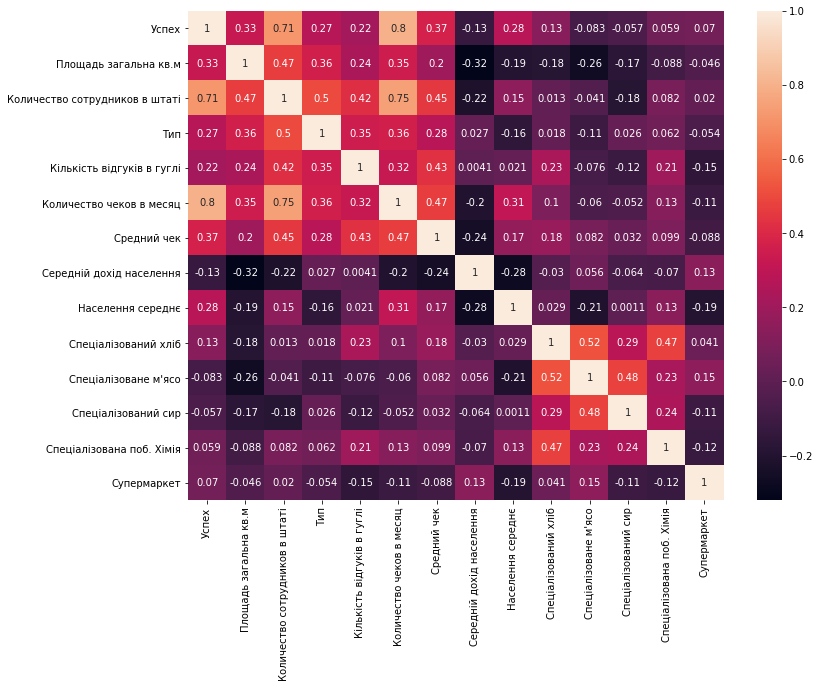

In [39]:
# Cheking correlations
import seaborn as sns
corrmat = dfm.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

In [40]:
#Classification Tree & Ensembles

In [41]:
from sklearn.model_selection import train_test_split
col = ['Количество чеков в месяц', 'Количество сотрудников в штаті']
X =dfm[col]
y = dfm['Успех']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [42]:
# Function Max Leaf
def max_leaf_nodes(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        ct = DecisionTreeClassifier(max_leaf_nodes = i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, ct.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, ct.predict(X_test)))
    
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")

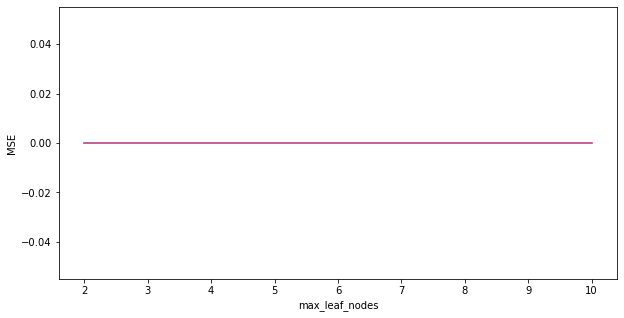

In [43]:
# The optimal number of max_leaf_nodes
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
max_leaf_nodes(X_train, X_test, y_train, y_test, [2, 4, 6, 8, 10])

In [44]:
# Fitting Classification Tree to the Training set (2 variables)
ct = DecisionTreeClassifier(max_leaf_nodes = 6, criterion = 'entropy', random_state = 10).fit(X_train, y_train)

In [45]:
# Predicting the Test set results
y_pred = ct.predict(X_test)
ct.score(X_test,y_test)

1.0

In [46]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[11  0]
 [ 0  3]]


In [47]:
#without errors

Text(0.5, 1.0, 'Boosting. Feature Importance')

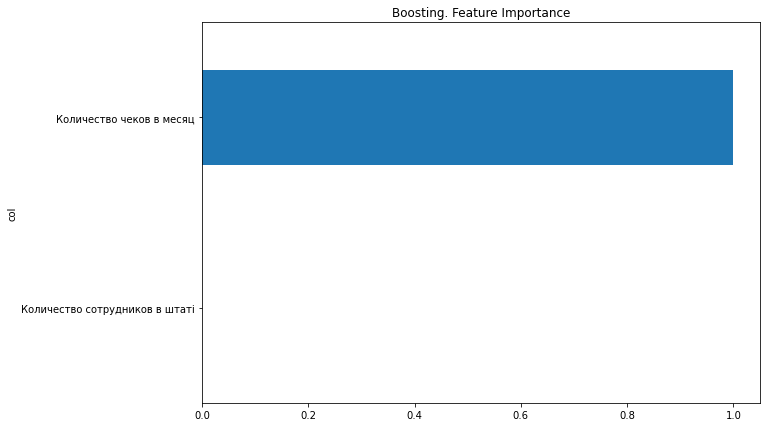

In [48]:
# Features importances
ct_imp = pd.DataFrame({'imp': ct.feature_importances_, 'col': col})
ct_imp = ct_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-25:]
ct_imp.plot(kind='barh', x='col', y='imp', figsize=(10, 7), legend=None)
plt.title('Boosting. Feature Importance')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


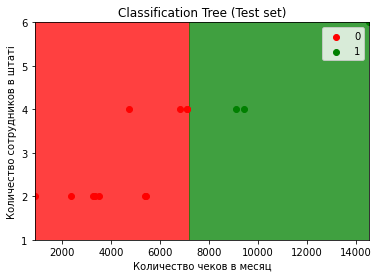

In [49]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set['Количество чеков в месяц'].min() - 1, stop = X_set['Количество чеков в месяц'].max() + 1),
                     np.arange(start = X_set['Количество сотрудников в штаті'].min() - 1, stop = X_set['Количество сотрудников в штаті'].max() + 1))
plt.contourf(X1, X2, ct.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set['Количество чеков в месяц'][y_set == j], X_set['Количество сотрудников в штаті'][y_set == j],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classification Tree (Test set)')
plt.xlabel('Количество чеков в месяц')
plt.ylabel('Количество сотрудников в штаті')
plt.legend()
plt.show()

In [50]:
#forest

In [51]:
def rf_best_n_estimator(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = RandomForestClassifier(n_estimators=i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test)))
    
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("N_estimators")

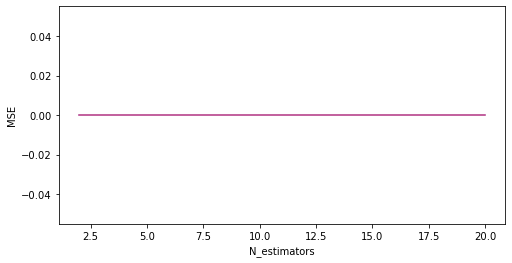

In [52]:
# The optimal number of trees 
from sklearn.ensemble import RandomForestClassifier    
rf_best_n_estimator(X_train, X_test, y_train, y_test, [2, 5, 10, 15, 20])

In [53]:
def rf_max_leaf_nodes(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = RandomForestClassifier(n_estimators=5, max_leaf_nodes =i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test)))
    
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")

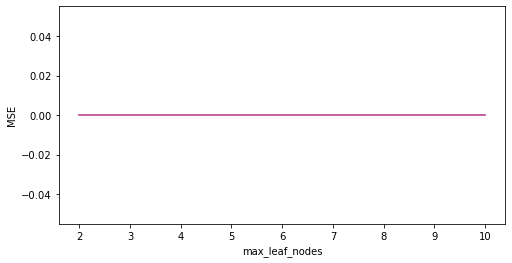

In [54]:
# The optimal number of max_leaf_nodes
rf_max_leaf_nodes(X_train, X_test, y_train, y_test, [2, 4, 6, 8, 10])

In [55]:
# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, max_leaf_nodes = 6, random_state = 10).fit(X_train, y_train)

In [56]:
# Predicting the Test set results
y_pred = rf.predict(X_test)
y_pred = (y_pred > 0.5)
rf.score(X_test,y_test).round(3)

1.0

In [57]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[11  0]
 [ 0  3]]


In [58]:
#without errors

Text(0.5, 1.0, 'Boosting. Feature Importance')

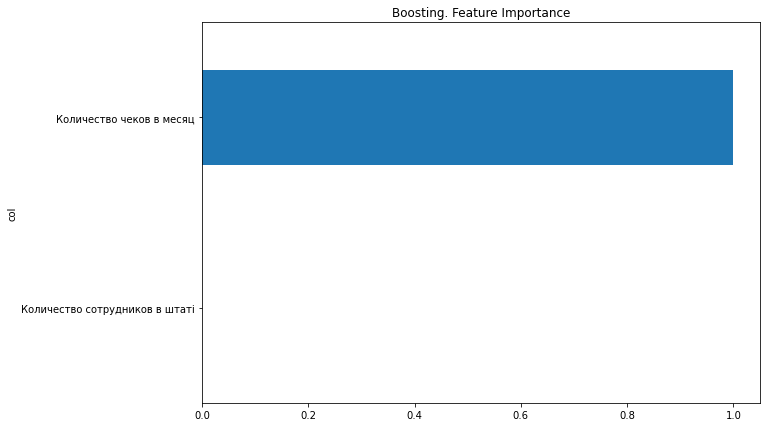

In [59]:
# Features importances
ct_imp = pd.DataFrame({'imp': ct.feature_importances_, 'col': col})
ct_imp = ct_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-25:]
ct_imp.plot(kind='barh', x='col', y='imp', figsize=(10, 7), legend=None)
plt.title('Boosting. Feature Importance')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


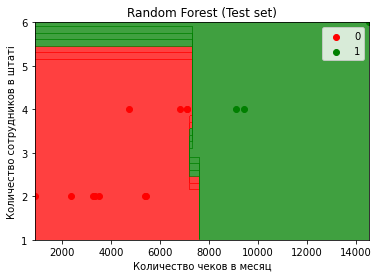

In [60]:
# Visualising the Test set results
X_set, y_set = X_test, y_test
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set['Количество чеков в месяц'].min() - 1, stop = X_set['Количество чеков в месяц'].max() + 1),
                     np.arange(start = X_set['Количество сотрудников в штаті'].min() - 1, stop = X_set['Количество сотрудников в штаті'].max() + 1))
plt.contourf(X1, X2, rf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set['Количество чеков в месяц'][y_set == j], X_set['Количество сотрудников в штаті'][y_set == j],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest (Test set)')
plt.xlabel('Количество чеков в месяц')
plt.ylabel('Количество сотрудников в штаті')
plt.legend()
plt.show()

In [61]:
#catboost

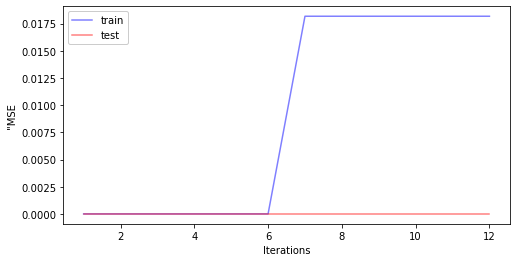

In [62]:
def catboost_best_iterations(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        catboost = CatBoostClassifier(iterations=i,random_state=10).fit(X_train, y_train,eval_set=(X_test, y_test),logging_level='Silent')
        mse_train.append(mean_squared_error(y_train, catboost.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, catboost.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel('"MSE')
    ax.set_xlabel('Iterations')
    ax.legend(framealpha=1, frameon=True);
    
from catboost import CatBoostClassifier
catboost_best_iterations(X_train, X_test, y_train, y_test, list(range(1,13)))

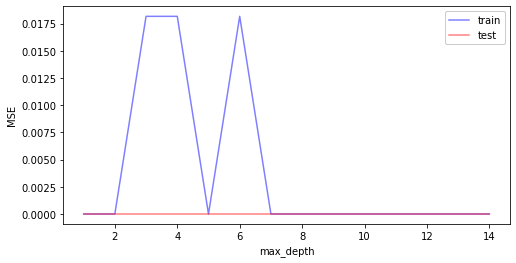

In [63]:
def catboost_max_depth(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        catboost = CatBoostClassifier(iterations=12,max_depth=i,random_state=10).fit(X_train,y_train,eval_set=(X_test, y_test),logging_level='Silent')
        mse_train.append(mean_squared_error(y_train, catboost.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, catboost.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_depth")
    ax.legend(framealpha=1, frameon=True);

catboost_max_depth(X_train, X_test, y_train, y_test, list(range(1,15)))

In [64]:
# Fitting CatBoost to the Training set
cb = CatBoostClassifier(iterations=6,max_depth=14,random_state=10).fit(X_train, y_train,eval_set=(X_test, y_test),logging_level='Silent')

In [65]:
# Predicting the Test set results
cb_y_pred = cb.predict(X_test)
cb.score(X_test,y_test).round(3)

1.0

In [66]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, cb_y_pred)
print(cm)

[[11  0]
 [ 0  3]]


In [67]:
#no errors again

Text(0.5, 1.0, 'Boosting. Feature Importance')

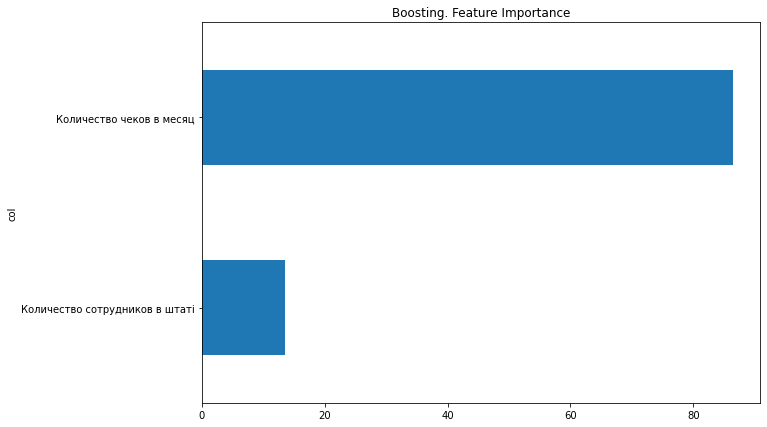

In [68]:
# Features importances
cb_imp = pd.DataFrame({'imp': cb.get_feature_importance(), 'col': col})
cb_imp = cb_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-25:]
cb_imp.plot(kind='barh', x='col', y='imp', figsize=(10, 7), legend=None)
plt.title('Boosting. Feature Importance')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


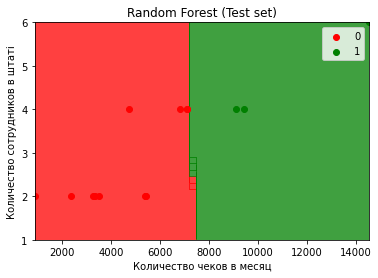

In [70]:
# Visualising the Test set results
X_set, y_set = X_test, y_test
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set['Количество чеков в месяц'].min() - 1, stop = X_set['Количество чеков в месяц'].max() + 1),
                     np.arange(start = X_set['Количество сотрудников в штаті'].min() - 1, stop = X_set['Количество сотрудников в штаті'].max() + 1))
plt.contourf(X1, X2, cb.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set['Количество чеков в месяц'][y_set == j], X_set['Количество сотрудников в штаті'][y_set == j],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest (Test set)')
plt.xlabel('Количество чеков в месяц')
plt.ylabel('Количество сотрудников в штаті')
plt.legend()
plt.show()

In [73]:
#Hierarchical Clustering
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(dfm)
df_arr = sc.transform(dfm)
df = pd.DataFrame(df_arr, columns=dfm.columns).round()

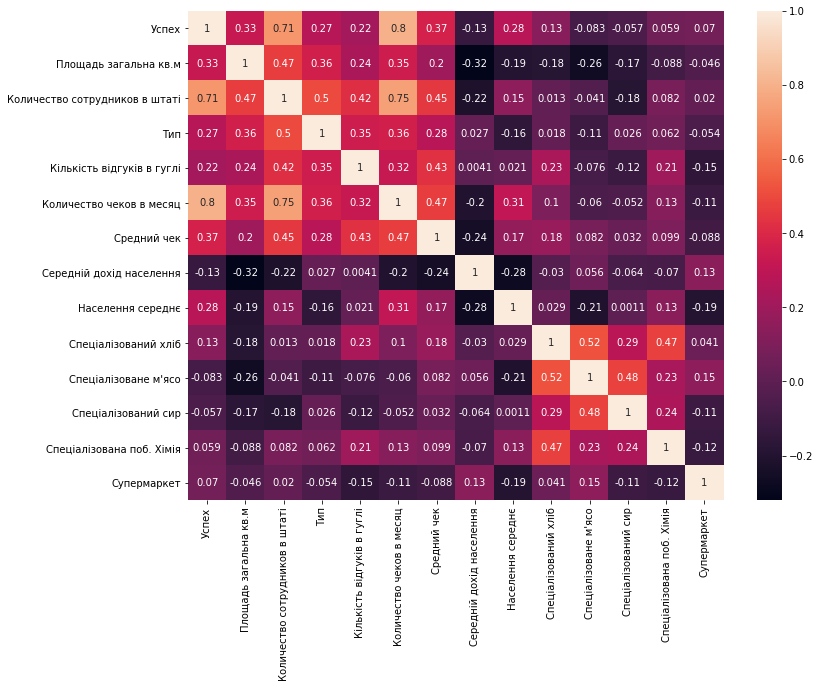

In [74]:
# Cheking correlations
import seaborn as sns
corrmat = dfm.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

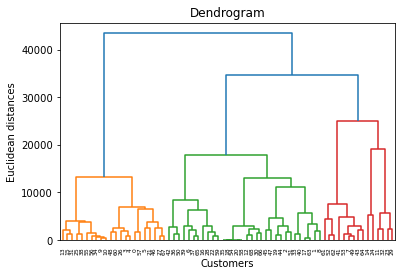

In [75]:
#number of clusters
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(dfm, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [76]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward').fit_predict(dfm)

In [77]:
hc

array([1, 2, 2, 1, 1, 1, 2, 0, 2, 1, 1, 0, 2, 1, 0, 1, 2, 2, 2, 2, 2, 1,
       2, 0, 0, 1, 1, 1, 2, 0, 2, 1, 0, 2, 1, 2, 2, 2, 1, 2, 2, 0, 2, 0,
       2, 2, 1, 2, 1, 0, 2, 2, 0, 0, 2, 1, 1, 1, 2, 2, 1, 0, 0, 2, 0, 2,
       2, 1, 2], dtype=int64)

In [78]:
#feature reduction
X = df.iloc[:, [0, 2, 5]]

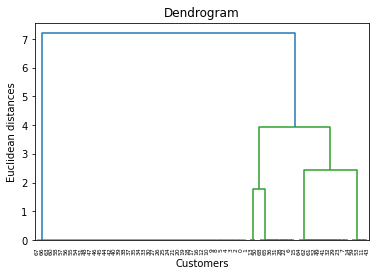

In [79]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [91]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward').fit_predict(dfm)
hc

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0], dtype=int64)

In [92]:
# Export hc clusters
import pickle
obj = {'hc': hc}
output = open('clust.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()

In [93]:
#K-Means Clustering

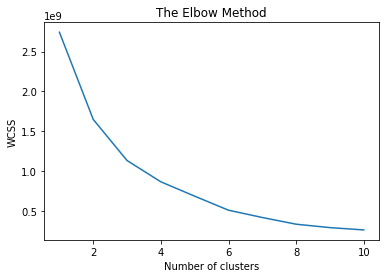

In [94]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(dfm)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

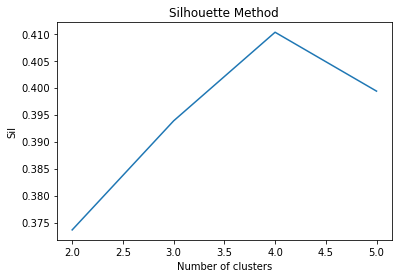

2:0.3736358846676426
3:0.39384420120129676
4:0.4102681484942458
5:0.39935449198365913


In [95]:
from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 6):
  kmeans = KMeans(n_clusters = k).fit(dfm)  
  preds = kmeans.fit_predict(dfm)
  sil.append(silhouette_score(dfm, preds, metric = 'euclidean'))


plt.plot(range(2, 6), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
 print(str(i+2) +":"+ str(sil[i]))

In [96]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0).fit_predict(dfm)
kms = KMeans(n_clusters = 4, random_state = 0).fit(dfm)
pd.DataFrame(kms.cluster_centers_, columns = dfm.columns).round(2)

,Успех,Площадь загальна кв.м,Количество сотрудников в штаті,Тип,Кількість відгуків в гуглі,Количество чеков в месяц,Средний чек,Середній дохід населення,Населення середнє,Спеціалізований хліб,Спеціалізоване м'ясо,Спеціалізований сир,Спеціалізована поб. Хімія,Супермаркет
0,0.27,42.97,3.27,0.13,31.43,5996.47,92.03,10793.17,8834.00,0.23,0.17,0.23,0.23,0.10
1,1.00,54.80,5.75,0.83,96.08,14153.58,115.50,11293.33,8639.83,0.58,0.33,0.08,0.42,0.17
2,0.16,42.41,3.00,0.36,32.68,4850.92,89.88,13090.00,1767.32,0.28,0.40,0.28,0.16,0.36
3,0.50,132.30,5.00,0.50,23.50,9348.00,113.00,660.00,2674.00,0.50,0.50,0.50,0.50,0.00


In [109]:
X1 = dfm.iloc[:, [0, 2, 5]]

In [110]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0).fit_predict(X1)
kms = KMeans(n_clusters = 2, random_state = 0).fit(X1)
pd.DataFrame(kms.cluster_centers_, columns = ['Успех','Количество сотрудников в штаті','Количество чеков в месяц']).round()

,Успех,Количество сотрудников в штаті,Количество чеков в месяц
0,1.0,6.0,13777.0
1,0.0,3.0,5397.0


In [111]:
#one class is successfull, second - not

In [112]:
# Importing hc clusters
import pickle
input = open('clust.pkl', 'rb')
obj = pickle.load(input)
input.close()
hc = obj["hc"]

In [115]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc,km)

-0.0557703846923129

In [116]:
# Export km clusters
import pickle
obj = {'km': km}
output = open('clust-km1.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()